# Analiza podatkov

## Nalaganje podatkov

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")
pd.set_option("display.max_rows", 10)

animeji = pd.read_csv("anime.csv", index_col="anime id")
anime_zvrsti = pd.read_csv("anime_zvrsti.csv", index_col="anime id")
anime_studii = pd.read_csv("anime_studii.csv", index_col="anime id")


In [192]:
animeji.head(10)

,naslov,ocena,tip,število epizod,leto izdaje,število članov
anime id,,,,,,
52991,Sousou no Frieren,9.29,TV,28,2023,1202293
5114,Fullmetal Alchemist: Brotherhood,9.10,TV,64,2009,3564751
9253,Steins;Gate,9.07,TV,24,2011,2728922
38524,Shingeki no Kyojin Season 3 Part 2,9.05,TV,10,2019,2486087
39486,Gintama: The Final,9.05,Movie,1,2021,173489
28977,Gintama°,9.05,TV,51,2015,674457
11061,Hunter x Hunter (2011),9.03,TV,148,2011,3068840
60022,One Piece Fan Letter,9.03,TV Special,1,2024,124289
820,Ginga Eiyuu Densetsu,9.02,OVA,110,1988,349294


In [193]:
anime_zvrsti.head(10)

,zvrst
anime id,
52991,Adventure
52991,Drama
52991,Fantasy
5114,Action
5114,Adventure
5114,Drama
5114,Fantasy
9253,Drama
9253,Sci-Fi


In [194]:
anime_studii.head(10)

,studio
anime id,
52991,Madhouse
5114,Bones
9253,White Fox
38524,Wit Studio
39486,Bandai Namco Pictures
28977,Bandai Namco Pictures
11061,Madhouse
60022,Toei Animation
820,K-Factory


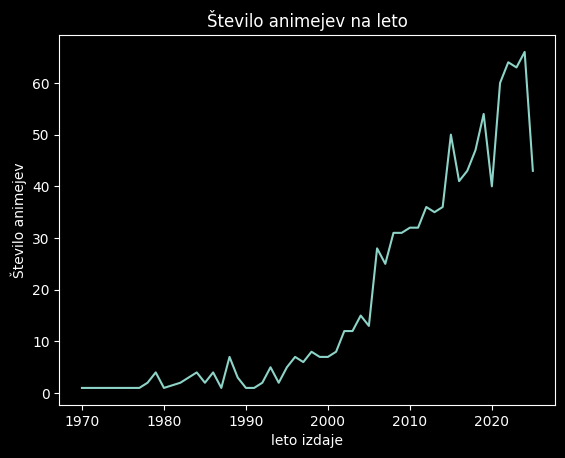

leto izdaje
1970     1
1977     1
1978     2
1979     4
1980     1
        ..
2021    60
2022    64
2023    63
2024    66
2025    43
Name: count, Length: 48, dtype: int64

In [196]:
st_animejev_na_leto = animeji["leto izdaje"].value_counts().sort_index()
st_animejev_na_leto.plot(kind="line")
plt.title("Število animejev na leto")
plt.ylabel("Število animejev")
plt.show()
st_animejev_na_leto

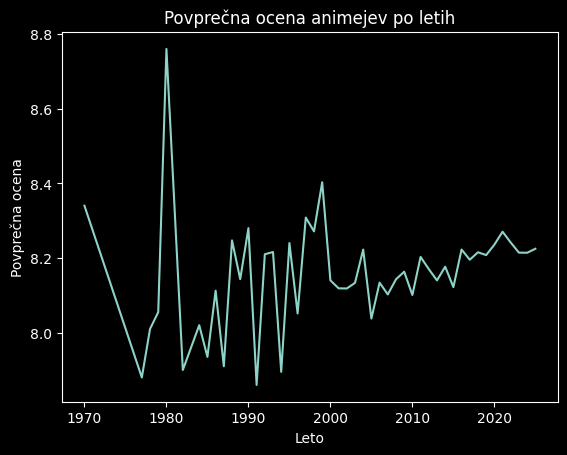

In [197]:
povprecn_ocena_na_leto = animeji.groupby("leto izdaje")["ocena"].mean()
povprecn_ocena_na_leto.plot(kind="line")
plt.title("Povprečna ocena animejev po letih")
plt.xlabel("Leto")
plt.ylabel("Povprečna ocena")
plt.show()

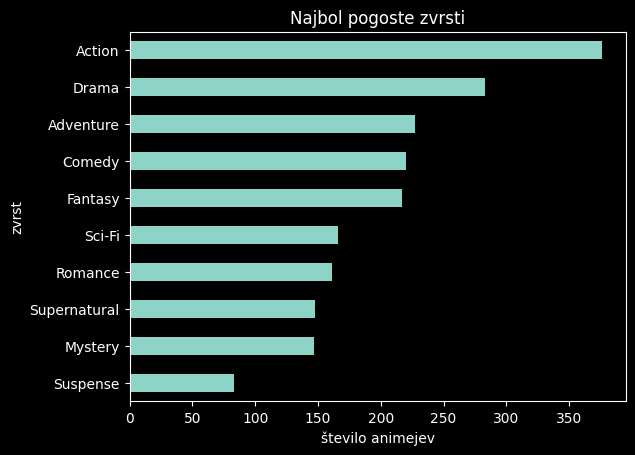

In [198]:
Najpogostejse_zvrsti = anime_zvrsti["zvrst"].value_counts(ascending=False).head(10)
Najpogostejse_zvrsti.plot(kind="barh").invert_yaxis()
plt.title("Najbol pogoste zvrsti")
plt.xlabel("število animejev")
plt.ylabel("zvrst")
plt.show()

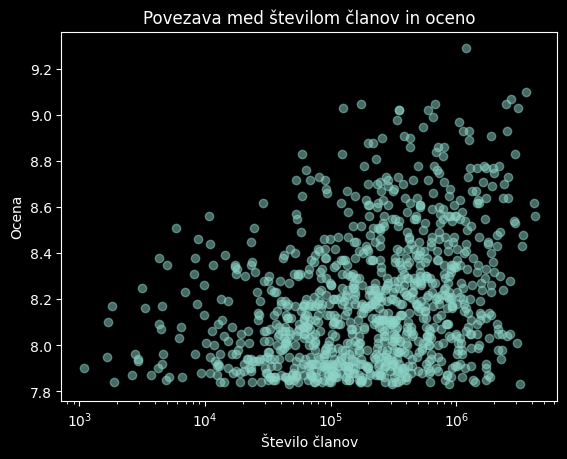

In [199]:
plt.scatter(animeji["število članov"],animeji["ocena"], alpha=0.5)
plt.title("Povezava med številom članov in oceno")
plt.xlabel("Število članov")
plt.ylabel("Ocena")
plt.xscale("log")  # ker so razlike velike
plt.show()

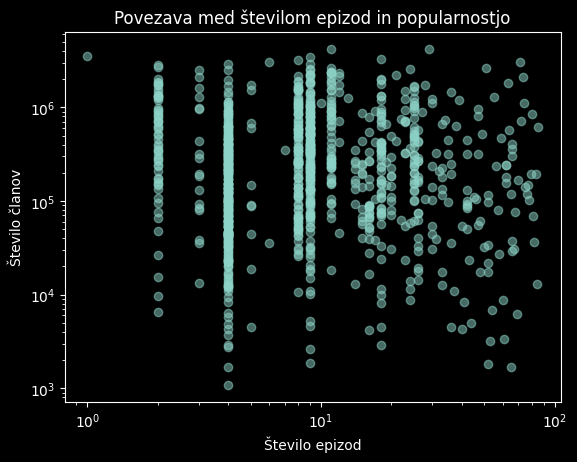

In [217]:
plt.scatter(animeji["število epizod"], animeji["število članov"],alpha=0.5)
plt.xscale("log")  
plt.yscale("log")
plt.title("Povezava med številom epizod in popularnostjo")
plt.xlabel("Število epizod")
plt.ylabel("Število članov")
plt.show()

Ugotovimo kateri studio je najboljsi

In [ ]:
animeji_s_studii = pd.merge(animeji, anime_studii, left_on="anime id", right_on="anime id")

In [ ]:
animeji_s_studii.groupby("studio").size().sort_values(ascending=False)

studio
Madhouse             60
Production I.G       57
TMS Entertainment    51
Sunrise              44
Bones                41
                     ..
Tokyo Kids            1
Triangle Staff        1
Topcraft              1
Yumeta Company        1
domerica              1
Length: 162, dtype: int64

In [ ]:
studio_povprecje = animeji_s_studii.groupby("studio")["ocena"].mean().sort_values(ascending=False)
studio_povprecje.head(10)

studio
TOHO animation STUDIO         8.885000
Enishiya                      8.880000
Studio Signpost               8.760000
DandeLion Animation Studio    8.720000
Liber                         8.670000
Pierrot Films                 8.670000
P.I.C.S.                      8.640000
Studio DURIAN                 8.630000
LAN Studio                    8.606667
Zero-G                        8.555000
Name: ocena, dtype: float64

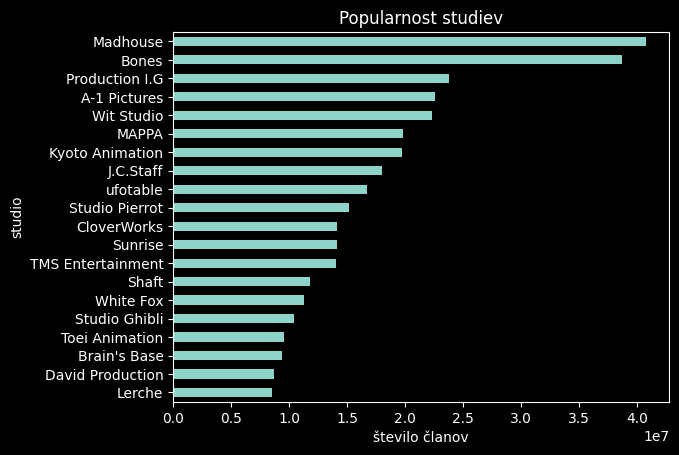

In [ ]:
studio_popularnost = animeji_s_studii.groupby("studio")["število članov"].sum().sort_values(ascending=False)
studio_popularnost.head(20).plot(kind="barh").invert_yaxis()
plt.title("Popularnost studiev")
plt.xlabel("število članov")
plt.show()


<Axes: xlabel='tip'>

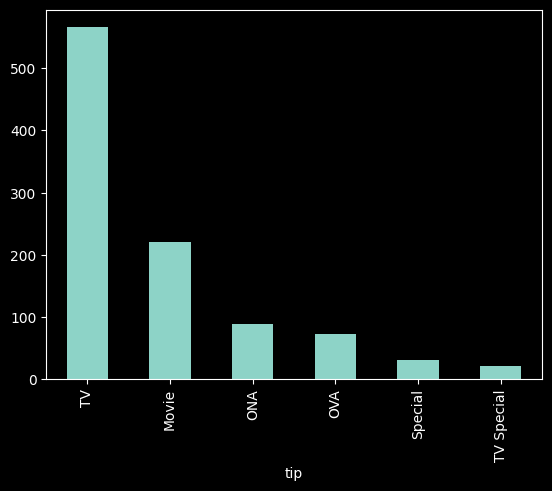

In [ ]:
anime_po_tipih = animeji["tip"].value_counts()
anime_po_tipih.plot(kind="bar")
plt.title("Število animejev po tipu")
plt.xlabel("Tip")
plt.ylabel("Število animejev")
plt.show()

In [207]:
povprecna_ocena_po_tipih = animeji.groupby("tip")["ocena"].mean().sort_values(ascending=False)
povprecna_ocena_po_tipih

tip
TV Special    8.216818
TV            8.211413
Movie         8.190588
ONA           8.161136
Special       8.078065
OVA           8.072361
Name: ocena, dtype: float64

<Axes: ylabel='število članov'>

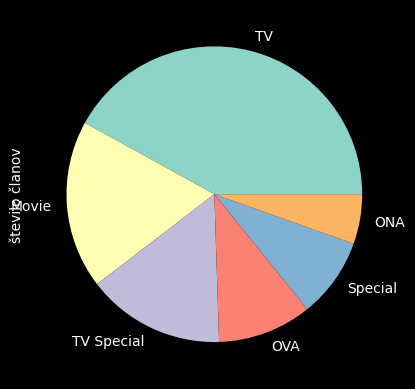

In [208]:
povprecna_popularnost_po_tipih = animeji.groupby("tip")["število članov"].mean().sort_values(ascending=False)
povprecna_popularnost_po_tipih.plot(kind="pie")

In [ ]:
animeji_z_zvrstmi = animeji.merge(anime_zvrsti, left_index=True, right_index=True)
najpogostejse_zvrsti = animeji_z_zvrstmi